<a href="https://colab.research.google.com/github/anpugliese/UNet/blob/main/benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and set up


In [1]:
# Cloud authentication.
from google.colab import auth
auth.authenticate_user()

In [2]:
# Import, authenticate and initialize the Earth Engine library.
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=8vl60uYb6sDOO8y5fRdJxad9b7sKfm68GzWrIoScsXE&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g4WHHljeJrYSnGlqcHajld4Bt9SMi0U5U_5GnsmJrqXYS3de2jsqvY

Successfully saved authorization token.


In [3]:
# INSERT YOUR BUCKET HERE:
BUCKET = 'cnn-imagery-bucket'

In [4]:
# Tensorflow setup.
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2.4.0


In [5]:
# Folium setup.
import folium
print(folium.__version__)

0.8.3


In [6]:
 AOI = ee.Geometry.LineString(
        [[-54.06450989780791, -5.518984629449065],
         [-51.87170746860869, -5.502239562399927],
         [-51.86072114048369, -7.292702848844641],
         [-54.05798676548369, -7.29815154343766],
         [-54.06279328403838, -5.517275970777259]])

# Variables

In [7]:
# INSERT YOUR BUCKET HERE:
BUCKET = 'cnn-imagery-bucket'
# Specify names locations for outputs in Cloud Storage. 
FOLDER = 'benchmark'
TRAINING_BASE = 'training_patches'
EVAL_BASE = 'eval_patches'


# Load forest and non forest polygons

In [8]:
forest_poly = ee.FeatureCollection(
    [
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.52213439250443, -5.573198183877048],
                        [-52.506169884447786, -5.572856483931514],
                        [-52.50599822307083, -5.555600378379183],
                        [-52.522649376635286, -5.55594208835088],
                    ]
                ]
            ),
            {"landcover": 0, "system:index": "0"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.375471403304104, -5.921228429500955],
                        [-52.375471403304104, -5.926009282969543],
                        [-52.37066488474942, -5.926009282969543],
                        [-52.37066488474942, -5.921228429500955],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "1"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.64051656931973, -5.917130522167451],
                        [-52.64051656931973, -5.920545447055744],
                        [-52.63776998728848, -5.920545447055744],
                        [-52.63776998728848, -5.917130522167451],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "2"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.79089193553067, -5.878198890389873],
                        [-52.79089193553067, -5.880931023794577],
                        [-52.787458707991604, -5.880931023794577],
                        [-52.787458707991604, -5.878198890389873],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "3"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.033350279036526, -6.0755606184413695],
                        [-52.033350279036526, -6.080852205189988],
                        [-52.02717046946621, -6.080852205189988],
                        [-52.02717046946621, -6.0755606184413695],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "4"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.248098661604885, -5.975181366562503],
                        [-52.248098661604885, -5.977913019817542],
                        [-52.24500875681973, -5.977913019817542],
                        [-52.24500875681973, -5.975181366562503],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "5"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.602168625124705, -7.065263251342789],
                        [-52.602168625124705, -7.075484612235732],
                        [-52.59186894250752, -7.075484612235732],
                        [-52.59186894250752, -7.065263251342789],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "6"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.73743779016377, -7.074121777186287],
                        [-52.73743779016377, -7.081617320155562],
                        [-52.72988468957783, -7.081617320155562],
                        [-52.72988468957783, -7.074121777186287],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "7"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.952886465880695, -6.977578260073003],
                        [-52.952886465880695, -6.98643845685982],
                        [-52.94533336529476, -6.98643845685982],
                        [-52.94533336529476, -6.977578260073003],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "8"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.47635448345882, -7.160881705650199],
                        [-52.47635448345882, -7.169057108750312],
                        [-52.47017467388851, -7.169057108750312],
                        [-52.47017467388851, -7.160881705650199],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "9"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.437559012267414, -7.193241816552864],
                        [-52.437559012267414, -7.203460320229011],
                        [-52.429319266173664, -7.203460320229011],
                        [-52.429319266173664, -7.193241816552864],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "10"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.295753202887205, -6.275852218585467],
                        [-52.295753202887205, -6.286260704995528],
                        [-52.28339358374658, -6.286260704995528],
                        [-52.28339358374658, -6.275852218585467],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "11"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.83235947244781, -6.95513415477286],
                        [-53.83235947244781, -6.957860517556319],
                        [-53.82995621317047, -6.957860517556319],
                        [-53.82995621317047, -6.95513415477286],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "12"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.92314360481002, -6.584130237078653],
                        [-53.92314360481002, -6.586006054680318],
                        [-53.921083668286585, -6.586006054680318],
                        [-53.921083668286585, -6.584130237078653],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "13"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.22390337675034, -7.2646464754917215],
                        [-52.22390337675034, -7.278268940300357],
                        [-52.21978350370347, -7.278268940300357],
                        [-52.21978350370347, -7.2646464754917215],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "14"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.945727140218466, -6.821391874673235],
                        [-52.945727140218466, -6.829232336865967],
                        [-52.938517362386435, -6.829232336865967],
                        [-52.938517362386435, -6.821391874673235],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "15"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.89920815953929, -6.415384700654517],
                        [-53.89920815953929, -6.425278617216508],
                        [-53.890625090691636, -6.425278617216508],
                        [-53.890625090691636, -6.415384700654517],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "16"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.04780725653538, -7.193885630754734],
                        [-52.04780725653538, -7.203422894479814],
                        [-52.04025415594944, -7.203422894479814],
                        [-52.04025415594944, -7.193885630754734],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "17"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-51.98806909735569, -7.2432728583238175],
                        [-51.98806909735569, -7.250425043642854],
                        [-51.981202642277566, -7.250425043642854],
                        [-51.981202642277566, -7.2432728583238175],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 0, "system:index": "18"},
        ),
    ]
)

nonforest_poly = ee.FeatureCollection(
    [
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.5549240096754, -5.864402051730304],
                        [-52.54822921597423, -5.863718999370253],
                        [-52.54531097256603, -5.853302347314658],
                        [-52.55852889859142, -5.854326944656087],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "0"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.61825668793517, -5.773123640520233],
                        [-52.61465179901916, -5.770561774066174],
                        [-52.62100326996642, -5.760228795250355],
                        [-52.6251231430133, -5.762363723647234],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "1"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.05971096643509, -6.609754023642797],
                        [-52.05541943201126, -6.607025690109822],
                        [-52.063830839481966, -6.593554322826394],
                        [-52.06803654321732, -6.596197468085703],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "2"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.10687460868883, -6.908381890395584],
                        [-52.099664830856796, -6.902076490650754],
                        [-52.10223975151109, -6.897645618951899],
                        [-52.10979285209703, -6.9049735766445615],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "3"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.00815245945864, -6.988778300960966],
                        [-52.00300261815005, -6.987244825047096],
                        [-52.004118417100244, -6.981025676730314],
                        [-52.00926825840884, -6.982473978929916],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "4"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-51.88369796116763, -6.966116423070969],
                        [-51.88369796116763, -6.9705466508478535],
                        [-51.877518151597314, -6.9705466508478535],
                        [-51.877518151597314, -6.966116423070969],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "5"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-51.94360778172427, -6.991845237694087],
                        [-51.94360778172427, -6.996445605040974],
                        [-51.939659570054346, -6.996445605040974],
                        [-51.939659570054346, -6.991845237694087],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "6"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.03046843846255, -7.016550381850619],
                        [-52.03046843846255, -7.019957885157087],
                        [-52.027550195054346, -7.019957885157087],
                        [-52.027550195054346, -7.016550381850619],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "7"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-51.97673842747622, -6.640154382400855],
                        [-51.97673842747622, -6.6425415147547895],
                        [-51.974163506821924, -6.6425415147547895],
                        [-51.974163506821924, -6.640154382400855],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "8"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.966068806567534, -6.23919914150141],
                        [-52.966068806567534, -6.243635882308389],
                        [-52.96160561076675, -6.243635882308389],
                        [-52.96160561076675, -6.23919914150141],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "9"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.17783506674567, -5.956230147126775],
                        [-53.17783506674567, -5.960498496927492],
                        [-53.175775130222235, -5.960498496927492],
                        [-53.175775130222235, -5.956230147126775],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "10"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.17217024130622, -5.966900959373155],
                        [-53.17217024130622, -5.969718019164664],
                        [-53.16847952170173, -5.969718019164664],
                        [-53.16847952170173, -5.966900959373155],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "11"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.812177946272854, -6.085802352113833],
                        [-52.812177946272854, -6.088533448141761],
                        [-52.80737142771817, -6.088533448141761],
                        [-52.80737142771817, -6.085802352113833],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "12"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.32396063763703, -6.074879057585988],
                        [-52.32396063763703, -6.081024128977606],
                        [-52.319840764590154, -6.081024128977606],
                        [-52.319840764590154, -6.074879057585988],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "13"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.44635519940461, -6.0673683195254355],
                        [-52.44635519940461, -6.073513476637609],
                        [-52.44360861737336, -6.073513476637609],
                        [-52.44360861737336, -6.0673683195254355],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "14"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.52552369560388, -6.203569407010798],
                        [-52.52552369560388, -6.2069825193202135],
                        [-52.51934388603357, -6.2069825193202135],
                        [-52.51934388603357, -6.203569407010798],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "15"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.144758512679104, -6.337345514702279],
                        [-52.144758512679104, -6.342293250335729],
                        [-52.14029531687832, -6.342293250335729],
                        [-52.14029531687832, -6.337345514702279],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "16"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.188703825179104, -6.353894651046913],
                        [-52.188703825179104, -6.3590128329389115],
                        [-52.18527059764004, -6.3590128329389115],
                        [-52.18527059764004, -6.353894651046913],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "17"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.08072881907559, -6.357989200635368],
                        [-52.08072881907559, -6.362254321786303],
                        [-52.07712393015957, -6.362254321786303],
                        [-52.07712393015957, -6.357989200635368],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "18"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.10446585044861, -6.341122708241218],
                        [-52.10446585044861, -6.344023089502582],
                        [-52.09897268638611, -6.344023089502582],
                        [-52.09897268638611, -6.341122708241218],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "19"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.2822681782379, -6.541404145484491],
                        [-52.27883495069884, -6.537652167238377],
                        [-52.28982127882384, -6.526054965619273],
                        [-52.29394115187071, -6.528783743117923],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "20"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.175494801773056, -6.571077888653194],
                        [-52.172748219741806, -6.575511744426338],
                        [-52.16347850538634, -6.5628922049437195],
                        [-52.167255055679306, -6.558799312623763],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "21"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.23867709929664, -6.577397057690071],
                        [-52.25446997305638, -6.561707884692855],
                        [-52.25721655979408, -6.56443647204403],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "22"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.56919750141908, -5.968272115832224],
                        [-52.567137564895646, -5.967759922868542],
                        [-52.56954082417299, -5.959223303038738],
                        [-52.571429099319474, -5.960076970999369],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "23"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.60043987202455, -5.941466708726849],
                        [-52.596148337600724, -5.938222653612133],
                        [-52.59752162861635, -5.936003025946159],
                        [-52.60181316304018, -5.938734874111175],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "24"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.574862326858536, -5.954272002691202],
                        [-52.57297405171205, -5.954272002691202],
                        [-52.572630728958146, -5.948125498800045],
                        [-52.57434734272768, -5.948466973041421],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "25"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.82949197830788, -6.88833807646945],
                        [-53.82889116348854, -6.886463427615349],
                        [-53.83249605240456, -6.881861985388977],
                        [-53.834041004797136, -6.883225380329389],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "26"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.87863004746071, -6.782238397918603],
                        [-53.87687051834694, -6.781258251237139],
                        [-53.880260830541765, -6.77490855706067],
                        [-53.88193452896706, -6.775760869863069],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "27"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.98042524399391, -6.641247394956346],
                        [-53.97845113815895, -6.641332649693311],
                        [-53.97956693710915, -6.634767991742153],
                        [-53.98128355087868, -6.6349385034453725],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "28"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-54.0346702391111, -6.434802813003757],
                        [-54.03295362534157, -6.4342057829507775],
                        [-54.035099392553484, -6.430367715861062],
                        [-54.036301022192156, -6.4313059127150645],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "29"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.83503151793205, -7.110867617668868],
                        [-53.83314324278557, -7.108823520648704],
                        [-53.840181359240646, -7.106438729297196],
                        [-53.84155465025627, -7.107631126520073],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "30"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.77168846983635, -7.130115751407428],
                        [-53.77083016295158, -7.1284124093310215],
                        [-53.77598000426018, -7.124494698524397],
                        [-53.777524956652755, -7.125005706181009],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "31"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.700620659777755, -7.168311530951417],
                        [-53.70117855925285, -7.170099883754098],
                        [-53.69384003538811, -7.1715901723923885],
                        [-53.6934967126342, -7.169886984979104],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "32"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.66235291298654, -7.259145062887463],
                        [-53.661752098167206, -7.2582084917961245],
                        [-53.66561447914865, -7.255058192908078],
                        [-53.66715943154123, -7.256761059910758],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "33"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.84956550407642, -6.875715427186351],
                        [-53.848750112535896, -6.8753319666913555],
                        [-53.850295064928474, -6.874181583349769],
                        [-53.850767133715095, -6.874607651578753],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "34"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-53.171835216232026, -5.998420572948207],
                        [-53.171835216232026, -6.000810668604837],
                        [-53.16874531144687, -6.000810668604837],
                        [-53.16874531144687, -5.998420572948207],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "35"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.829636685914316, -6.049225608480116],
                        [-52.82834922558717, -6.047433197561664],
                        [-52.830924146241465, -6.0481160214692515],
                        [-52.83504401928834, -6.049652372108756],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "36"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.436619450369314, -6.134503567467703],
                        [-52.436619450369314, -6.138770510504264],
                        [-52.430096318045095, -6.138770510504264],
                        [-52.430096318045095, -6.134503567467703],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "37"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.43069713286443, -6.110437369901434],
                        [-52.43069713286443, -6.113082997831527],
                        [-52.4264055984406, -6.113082997831527],
                        [-52.4264055984406, -6.110437369901434],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "38"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.40921824422207, -6.153130201005403],
                        [-52.40921824422207, -6.1572263235858005],
                        [-52.404755048421286, -6.1572263235858005],
                        [-52.404755048421286, -6.153130201005403],
                    ]
                ],
                None,
                False,
            ),
            {"landcover": 1, "system:index": "39"},
        ),
        ee.Feature(
            ee.Geometry.Polygon(
                [
                    [
                        [-52.279122316469554, -6.359592612176883],
                        [-52.278864824404124, -6.372046627804279],
                        [-52.27465912066877, -6.372558430202741],
                        [-52.27525993548811, -6.35882488900603],
                    ]
                ]
            ),
            {"landcover": 1, "system:index": "40"},
        ),
    ]
)


# Load imagery

In [9]:
# Use Landsat 8 surface reflectance data.
#l8sr = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')


# Cloud masking function.
def maskClouds(image):
  scored = ee.Algorithms.Landsat.simpleCloudScore(image)
  return image.updateMask(scored.select(['cloud']).lt(4))

def addQualityBands(image):
  return maskClouds(image).addBands(image.metadata('system:time_start'))

collection2019 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA').filterDate('2019-06-01', '2019-06-30').filterBounds(AOI).map(addQualityBands)

#print(collection2019,'least cloud 2019')

image2019 = collection2019.qualityMosaic('system:time_start')
#print(image2019)
#landsat2019_print = ee.Image(image2019).int32()





**Model specification**

In [10]:
newfc = forest_poly.merge(nonforest_poly)

bands = ['B2', 'B3', 'B4', 'B5'];

#create training data
training = image2019.select(bands).sampleRegions(
  collection = newfc,
  properties = ['landcover'],
  scale = 30,
)
#print(training.getInfo)
withRandom = training.randomColumn('random')
trainingPartition = withRandom.filter(ee.Filter.rangeContains('random',0, 0.8));
testingPartition = withRandom.filter(ee.Filter.rangeContains('random', 0.8, 1.0));
#print(trainingPartition, 'trainingPartiton');
#print(testingPartition, 'testingPartition');

##################### Random Forest ##################
#Trained with 80% of our data (80 points over 100 points).
Classifier = ee.Classifier.smileRandomForest(10).train(
  features= trainingPartition,
  classProperty= 'landcover',
  inputProperties= bands
)

classified2019 = image2019.select(bands).classify(Classifier);


print(classified2019.getInfo(),'classified2019')
'''
var amazon2019_classification = ee.Image(classified2019).toDouble();
// Export the image to Cloud Storage.
Export.image.toDrive({
  image: amazon2019_classification,
  description: 'amazon2019_classification',
  scale: 30,
  region: AOI,
})
'''
band = ['classification']
test = testingPartition.classify(Classifier)
#print(test, 'test');
confusionMatrix = test.errorMatrix('landcover', 'classification')
print('Confusion Matrix', confusionMatrix.getInfo())
accuracy = confusionMatrix.accuracy()
print('accuracy', accuracy.getInfo())
kappa = confusionMatrix.kappa()
#print('kappa', kappa)

trainAccuracy = Classifier.confusionMatrix()
print('Resubstitution error matrix: ', trainAccuracy.getInfo())
print('Training overall accuracy: ', trainAccuracy.accuracy().getInfo())

{'type': 'Image', 'bands': [{'id': 'classification', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -2147483648, 'max': 2147483647}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]} classified2019
Confusion Matrix [[3206, 16], [22, 2896]]
accuracy 0.9938110749185668
Resubstitution error matrix:  [[13125, 12], [40, 11195]]
Training overall accuracy:  0.9978664040702445


In [11]:
print(training.size().getInfo())
print(newfc.size().getInfo())

30512
60


See map

In [12]:
#A pallete to use for visualizing landcover images.
landcoverPalette = [
    '1d7e34', # forest
    '7c7c7c', # urban
#   '339CFF', # water
]

# A set of visualization parameters using the landcover palette
landcoverVisualization = {'palette': landcoverPalette, 'min': 0, 'max': 2}
mapid = image2019.getMapId({'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3})
map = folium.Map(location = [-5.7, -51.3],  zoom_start=6)
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='masked imagery',
  ).add_to(map)

mapid2 = classified2019.getMapId(landcoverVisualization)
folium.TileLayer(
    tiles=mapid2['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='classification2019',
  ).add_to(map)


polyImage = ee.Image(0).byte().paint(forest_poly, 1).paint(nonforest_poly, 2)
polyImage = polyImage.updateMask(polyImage)

mapid3 = polyImage.getMapId({'min': 1, 'max': 2, 'palette': ['green', 'orange']})
folium.TileLayer(
    tiles=mapid3['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='polygons',
  ).add_to(map)
map.add_child(folium.LayerControl())
map

Storage

In [32]:
# Specify names locations for outputs in Cloud Storage. 
FOLDER = 'benchmark'
TRAINING_BASE = 'training_patches'
EVAL_BASE = 'eval_patches'

# Specify inputs (Landsat bands) to the model and the response variable.
BANDS = bands
RESPONSE = 'landcover'
FEATURES = BANDS + [RESPONSE]

# Specify the size and shape of patches expected by the model.
KERNEL_SIZE = 3
KERNEL_SHAPE = [KERNEL_SIZE, KERNEL_SIZE]


Stack the 2D images (Landsat composite and NLCD impervious surface) to create a single image from which samples can be taken. Convert the image into an array image in which each pixel stores 256x256 patches of pixels for each band. This is a key step that bears emphasis: to export training patches, convert a multi-band image to an array image using neighborhoodToArray(), then sample the image at points.

In [33]:
featureStack = image2019

list = ee.List.repeat(1, KERNEL_SIZE)
lists = ee.List.repeat(list, KERNEL_SIZE)
kernel = ee.Kernel.rectangle(KERNEL_SIZE, KERNEL_SIZE, 'pixels')

arrays = featureStack.neighborhoodToArray(kernel)

Unfortunately, you cannot use Tensorflow directly in Earth Engine. To overcome this problem, you will save the train/test dataset into a Google Cloud Storage Bucket (GCS) (you could use Google Drive instead), since both GEE and GCS and Tensorflow can access to them. More details about how to export data in GEE you can find them in the next link or into the Official Exporting data guide.

In [34]:
#create training data
training = arrays.sampleRegions(
  collection = newfc,
  properties = ['landcover'],
  scale = 30,
)
#print(training.getInfo)
withRandom = training.randomColumn('random')
trainingPartition = withRandom.filter(ee.Filter.rangeContains('random',0, 0.8));
testingPartition = withRandom.filter(ee.Filter.rangeContains('random', 0.8, 1.0));

In [125]:
#print(ee.Array.toList(trainingPartition).get(0))

In [35]:
desc = TRAINING_BASE + 'new'
task_train = ee.batch.Export.table.toCloudStorage(
  collection = trainingPartition,
  description = desc,
  bucket = BUCKET,
  fileNamePrefix = FOLDER + '/' + desc,
  fileFormat = 'TFRecord',
  selectors = BANDS + [RESPONSE]
)
task_train.start()
'''
# Export all the evaluation data.
geomSample = ee.FeatureCollection([])
for g in range(evalPolyList.size().getInfo()):
  for i in range(n):
    sample = arrays.sample(
      region = ee.Feature(evalPolyList.get(g)).geometry(), 
      scale = 30,
      numPixels = N / n,
      seed = i,
      tileScale = 8
    )
    geomSample = geomSample.merge(sample)
'''
desc = EVAL_BASE + 'new'
task_eval = ee.batch.Export.table.toCloudStorage(
  collection = testingPartition,
  description = desc,
  bucket = BUCKET,
  fileNamePrefix = FOLDER + '/' + desc,
  fileFormat = 'TFRecord',
  selectors = BANDS + [RESPONSE]
)
task_eval.start()

# Monitor task progress
# Code Extracted here:
# https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/TF_demo1_keras.ipynb
import time 
while task_train.active():
  print('Polling for task (id: {}).'.format(task_train.id))
  time.sleep(5)
while task_eval.active():
  print('Polling for task (id: {}).'.format(task_eval.id))
  time.sleep(5)

print('Done!')

Polling for task (id: GF2XKYGTOHEKUWBYPJ4B6HYP).
Polling for task (id: GF2XKYGTOHEKUWBYPJ4B6HYP).
Polling for task (id: GF2XKYGTOHEKUWBYPJ4B6HYP).
Polling for task (id: GF2XKYGTOHEKUWBYPJ4B6HYP).
Done!






# Training data

In [75]:
def input_fn(fileNames, numEpochs=None, shuffle=True, batchSize=16, side = 7):
  # Read `TFRecordDatasets` 
  dataset = tf.data.TFRecordDataset(fileNames, compression_type='GZIP')

  # Names of the features 
  #COLUMNS

  feature_columns = {
    'B2': tf.io.FixedLenFeature([side, side], dtype=tf.float32),  
    'B3': tf.io.FixedLenFeature([side, side], dtype=tf.float32),  
    'B4': tf.io.FixedLenFeature([side, side], dtype=tf.float32),    
    'B5': tf.io.FixedLenFeature([side, side], dtype=tf.float32),    
    'landcover': tf.io.FixedLenFeature([1,1], dtype=tf.float32)
  }
  
  
  # Make a parsing function
  def parse(example_proto):
    parsed_features = tf.io.parse_single_example(example_proto, feature_columns)       
    # Separate the class labels from the training features
    labels = parsed_features.pop('landcover')
    #print(labels)
    
    # passing of 7x7 to 6x6
    parsed_features = {key:value[1:side,1:side] for key,value in parsed_features.items()} 
    #return parsed_features, tf.cast(labels, tf.int32)
    return parsed_features, labels
  
  # Passing of FeatureColumns to a 4D tensor
  def stack_images(features,label):    
    #print(features)
    
    feature_list = []
    for l in features.values():
      feature_list.append(l)
    #print(feature_list)
    nfeat = tf.transpose(tf.squeeze(tf.stack(feature_list)))
    nlabel = (tf.transpose(label))[:,:,tf.newaxis]
    print(nlabel)
    return nfeat, nlabel
  
  dataset = dataset.map(parse, num_parallel_calls=4)
  dataset = dataset.map(stack_images, num_parallel_calls=4)
  
  if shuffle:
    dataset = dataset.shuffle(buffer_size = batchSize * 10)
  dataset = dataset.batch(batchSize)
  dataset = dataset.repeat(numEpochs)
  
  return dataset

In [76]:
# Fullname train/test db

filesList = !gsutil ls 'gs://'{BUCKET}'/'{FOLDER}

trainFilePath = [s for s in filesList if TRAINING_BASE in s]

testFilePath = [s for s in filesList if EVAL_BASE in s]

print(trainFilePath)
train_dba = input_fn(trainFilePath,10,True)

test_dba = input_fn(testFilePath, numEpochs=1, batchSize=1, shuffle=False)


['gs://cnn-imagery-bucket/benchmark/training_patchesnew.tfrecord.gz']
Tensor("strided_slice:0", shape=(1, 1, 1), dtype=float32)
Tensor("strided_slice:0", shape=(1, 1, 1), dtype=float32)


In [44]:
print(train_dba.take(2).as_numpy_iterator().next())

(array([[[[0.09436393, 0.07228535, 0.04873315, 0.25785914],
         [0.09501026, 0.07533602, 0.05155114, 0.27880016],
         [0.09444149, 0.07184585, 0.04893997, 0.25845376],
         [0.09286445, 0.07254388, 0.04826779, 0.26403803],
         [0.0921147 , 0.07156146, 0.04697514, 0.28857267],
         [0.09353663, 0.0739141 , 0.04956045, 0.29407936]],

        [[0.09490684, 0.07311265, 0.04943118, 0.26827794],
         [0.09441563, 0.07525846, 0.04961216, 0.3032831 ],
         [0.09320053, 0.06993271, 0.04594101, 0.27362955],
         [0.09281274, 0.07156146, 0.04754391, 0.2913648 ],
         [0.09183032, 0.07306094, 0.0479317 , 0.30767813],
         [0.09263176, 0.0738624 , 0.04803512, 0.31181464]],

        [[0.0944932 , 0.07272486, 0.04844876, 0.2946223 ],
         [0.0933298 , 0.07182   , 0.04733708, 0.26975158],
         [0.09369174, 0.07329363, 0.04847462, 0.28376397],
         [0.09397613, 0.07313851, 0.04857803, 0.28702146],
         [0.09312297, 0.07373313, 0.04824194, 0.292

[[[0.12209141 0.18265235 0.23481107]
  [0.12138045 0.1819414  0.23681468]
  [0.12454745 0.18226458 0.23707321]
  [0.12474135 0.18045485 0.23778416]
  [0.12202677 0.18375112 0.23500496]
  [0.11931219 0.17980851 0.2335184 ]]

 [[0.12176824 0.18084265 0.23448789]
  [0.11976462 0.17690004 0.23590982]
  [0.1273913  0.18808153 0.23830123]
  [0.12584011 0.18846932 0.23817196]
  [0.12648644 0.19247654 0.23565128]
  [0.11666224 0.17735246 0.23241965]]

 [[0.12099265 0.18394502 0.23403546]
  [0.12183287 0.18071339 0.23590982]
  [0.12887785 0.18834007 0.23752564]
  [0.12234993 0.17961463 0.23610371]
  [0.12066948 0.18135971 0.23216112]
  [0.11743784 0.17890365 0.23028675]]

 [[0.11898904 0.17980851 0.2346818 ]
  [0.12357795 0.18278164 0.2372671 ]
  [0.1240304  0.18814616 0.23603909]
  [0.11485253 0.17483178 0.23300134]
  [0.11885977 0.17890365 0.23203185]
  [0.11982925 0.18265235 0.2295758 ]]

 [[0.12260847 0.18207067 0.2388183 ]
  [0.12112191 0.18181214 0.236233  ]
  [0.11834271 0.17954999 0.233

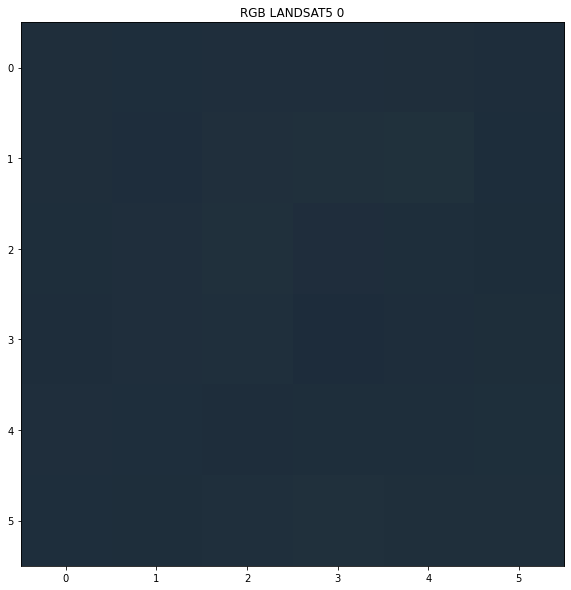

[[[0.1047698  0.16171134 0.21891138]
  [0.10147353 0.16074184 0.21380538]
  [0.10302472 0.1652015  0.21794188]
  [0.10528687 0.1633918  0.21651997]
  [0.11013433 0.16869166 0.21916991]
  [0.11013433 0.16907947 0.21994552]]

 [[0.11304281 0.1736684  0.22253083]
  [0.101215   0.16087112 0.21445172]
  [0.10211986 0.16229302 0.21535657]
  [0.10677342 0.1671405  0.21548584]
  [0.09927601 0.15544194 0.21490416]
  [0.09927601 0.15867358 0.21238348]]

 [[0.10625637 0.1640381  0.2173602 ]
  [0.10412347 0.16242228 0.21606755]
  [0.10095647 0.15835044 0.21406391]
  [0.1061271  0.16552466 0.21477489]
  [0.096109   0.15233958 0.2112847 ]
  [0.10115036 0.16662343 0.21335296]]

 [[0.10296009 0.16222838 0.21483952]
  [0.10069794 0.15906139 0.21341759]
  [0.09791873 0.15847968 0.2128359 ]
  [0.10283082 0.16248691 0.21503341]
  [0.10302472 0.16138816 0.21445172]
  [0.10276619 0.17043677 0.21425782]]

 [[0.10470517 0.16423202 0.21555048]
  [0.10140889 0.15854432 0.21496879]
  [0.10043941 0.16087112 0.214

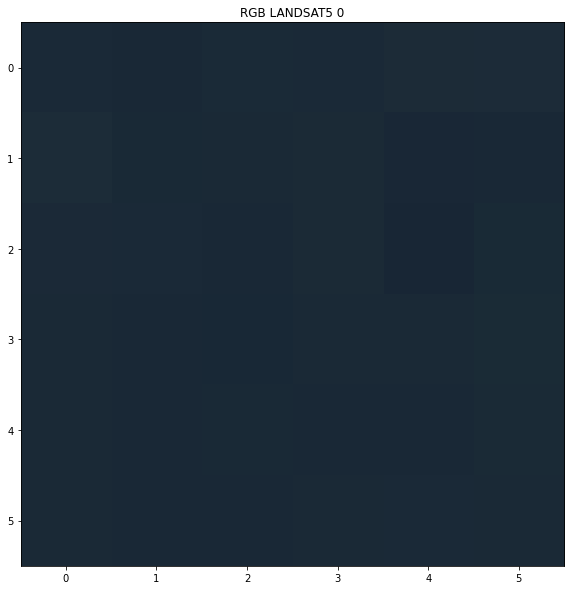

[[[0.1091002  0.17114772 0.21936381]
  [0.10522223 0.16843313 0.21910527]
  [0.10386495 0.16326252 0.2169724 ]
  [0.10179669 0.1602894  0.21606755]
  [0.10140889 0.1618406  0.21535657]
  [0.09888821 0.15751019 0.21580902]]

 [[0.10735512 0.1677868  0.21820042]
  [0.10864778 0.1633918  0.21839432]
  [0.10186133 0.15796262 0.21671386]
  [0.10380031 0.16242228 0.21458098]
  [0.1010211  0.16158207 0.21380538]
  [0.10043941 0.15725166 0.21600291]]

 [[0.10418811 0.16054794 0.21600291]
  [0.11414156 0.1687563  0.22343569]
  [0.1047698  0.16171134 0.21891138]
  [0.10147353 0.16074184 0.21380538]
  [0.10302472 0.1652015  0.21794188]
  [0.10528687 0.1633918  0.21651997]]

 [[0.1055454  0.16384421 0.21748947]
  [0.12260847 0.18530232 0.22589174]
  [0.11304281 0.1736684  0.22253083]
  [0.101215   0.16087112 0.21445172]
  [0.10211986 0.16229302 0.21535657]
  [0.10677342 0.1671405  0.21548584]]

 [[0.1087124  0.16966118 0.22162595]
  [0.11045749 0.17172942 0.22026867]
  [0.10625637 0.1640381  0.217

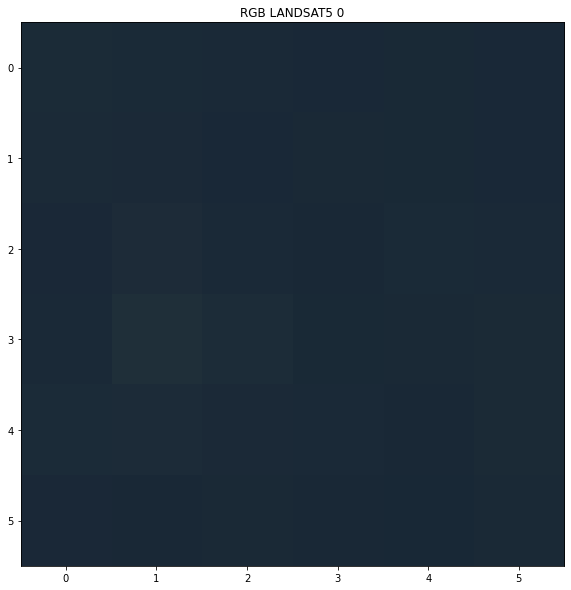

[[[0.11782563 0.17683542 0.23364767]
  [0.12642181 0.18924491 0.23965852]
  [0.12441818 0.18200605 0.2368793 ]
  [0.11595128 0.17360376 0.23009287]
  [0.11763174 0.17560738 0.23254892]
  [0.12655108 0.18801689 0.23707321]]

 [[0.12138045 0.1819414  0.23681468]
  [0.12454745 0.18226458 0.23707321]
  [0.12474135 0.18045485 0.23778416]
  [0.12202677 0.18375112 0.23500496]
  [0.11931219 0.17980851 0.2335184 ]
  [0.12112191 0.1819414  0.23287207]]

 [[0.11976462 0.17690004 0.23590982]
  [0.1273913  0.18808153 0.23830123]
  [0.12584011 0.18846932 0.23817196]
  [0.12648644 0.19247654 0.23565128]
  [0.11666224 0.17735246 0.23241965]
  [0.12047558 0.17683542 0.23364767]]

 [[0.12183287 0.18071339 0.23590982]
  [0.12887785 0.18834007 0.23752564]
  [0.12234993 0.17961463 0.23610371]
  [0.12066948 0.18135971 0.23216112]
  [0.11743784 0.17890365 0.23028675]
  [0.12390113 0.18478526 0.23384157]]

 [[0.12357795 0.18278164 0.2372671 ]
  [0.1240304  0.18814616 0.23603909]
  [0.11485253 0.17483178 0.233

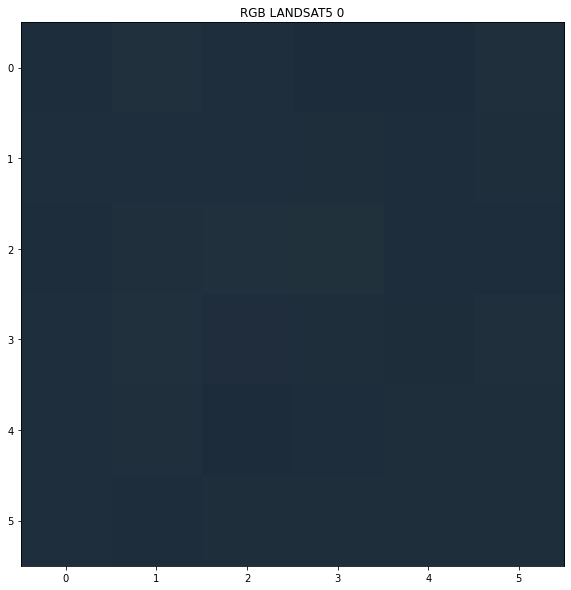

[[[0.11885977 0.17890365 0.23203185]
  [0.11982925 0.18265235 0.2295758 ]
  [0.12008779 0.184656   0.23157941]
  [0.11401229 0.17670615 0.22666731]
  [0.11407693 0.17340988 0.22867095]
  [0.11730857 0.17670615 0.23261355]]

 [[0.12144507 0.18284626 0.23494034]
  [0.12060485 0.18433282 0.23280743]
  [0.11847197 0.18045485 0.23009287]
  [0.11730857 0.18006705 0.22847705]
  [0.11252575 0.17586592 0.22905873]
  [0.11614518 0.1752196  0.22873558]]

 [[0.12196214 0.18459135 0.23397082]
  [0.12254383 0.18756446 0.23397082]
  [0.12344868 0.18549621 0.2335184 ]
  [0.12319016 0.18510841 0.23119164]
  [0.1171793  0.17980851 0.23145014]
  [0.11937682 0.17754637 0.23002824]]

 [[0.11982925 0.1819414  0.2301575 ]
  [0.12377186 0.18937418 0.2331306 ]
  [0.11969998 0.1825231  0.23177332]
  [0.11840732 0.17980851 0.229188  ]
  [0.1187305  0.18077803 0.23170868]
  [0.12241457 0.1868535  0.23455253]]

 [[0.11860123 0.17909756 0.23157941]
  [0.11853659 0.17909756 0.231127  ]
  [0.12034632 0.1834926  0.231

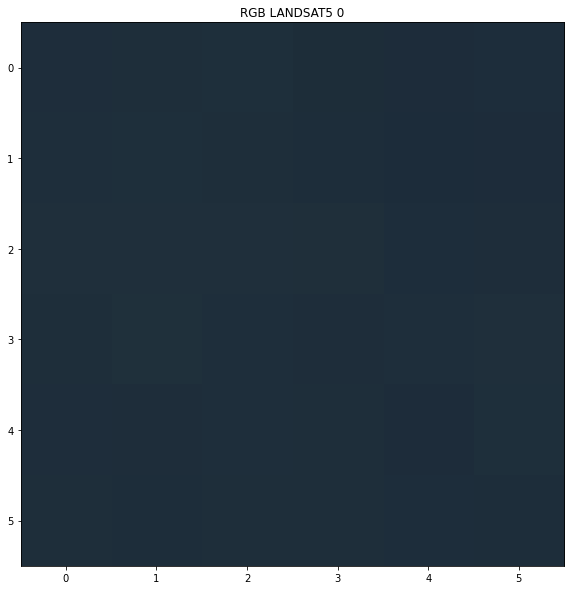

[[[0.10205522 0.1597077  0.21988088]
  [0.10806608 0.17075993 0.22078574]
  [0.11058676 0.17347449 0.22227229]
  [0.14366192 0.21146405 0.24710113]
  [0.12276445 0.18545687 0.24159835]
  [0.13691446 0.2032754  0.249787  ]]

 [[0.10787218 0.16649416 0.22104427]
  [0.11116846 0.17185868 0.22194913]
  [0.11129773 0.1699197  0.22317715]
  [0.12787418 0.20013095 0.24094325]
  [0.09891906 0.16429736 0.2244349 ]
  [0.12335403 0.19082862 0.23871593]]

 [[0.11116846 0.17256963 0.2224662 ]
  [0.11330134 0.17437936 0.22304788]
  [0.10793681 0.16953191 0.22162595]
  [0.16207004 0.23747125 0.25836873]
  [0.10730425 0.17117582 0.2230592 ]
  [0.0999672  0.16514897 0.22463143]]

 [[0.1098758  0.17644762 0.22220767]
  [0.10729048 0.16759291 0.21994552]
  [0.1055454  0.16726974 0.21981625]
  [0.10657952 0.16642952 0.22149669]
  [0.12892233 0.197052   0.24100876]
  [0.11247949 0.17274806 0.22849649]]

 [[0.10780755 0.16882093 0.22130279]
  [0.10761365 0.16455518 0.22188449]
  [0.11297818 0.17677078 0.223

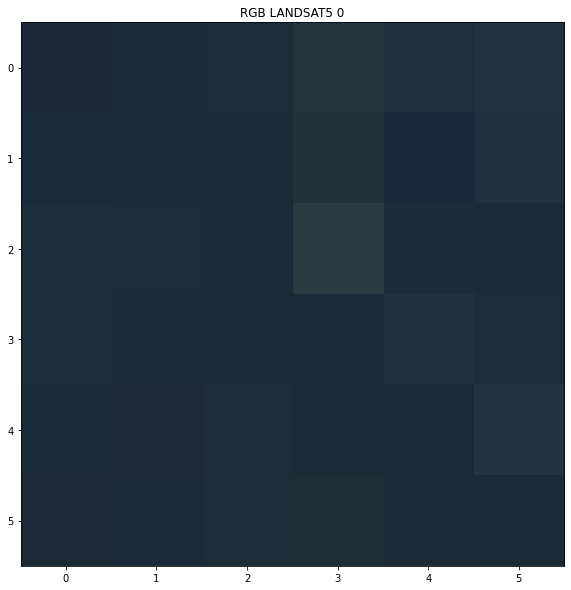

[[[0.12649848 0.19082862 0.22666222]
  [0.12545033 0.19174576 0.2272518 ]
  [0.12603992 0.19148372 0.22810343]
  [0.12472972 0.19148372 0.22797242]
  [0.12499176 0.19109067 0.22757936]
  [0.12440218 0.19017354 0.2273173 ]]

 [[0.12603992 0.19095965 0.22679323]
  [0.12564686 0.19181126 0.22790691]
  [0.12623644 0.19102515 0.22771038]
  [0.12427115 0.1905666  0.22744834]
  [0.12237139 0.18958396 0.22541754]
  [0.12230588 0.1878152  0.22587611]]

 [[0.12558134 0.1905666  0.22744834]
  [0.12472972 0.19109067 0.2278414 ]
  [0.12414014 0.19037007 0.22738281]
  [0.12230588 0.1892564  0.22613814]
  [0.12066815 0.18820825 0.22594161]
  [0.12125774 0.18748766 0.22554857]]

 [[0.12407463 0.18938743 0.22679323]
  [0.1231575  0.18912539 0.22633466]
  [0.12197834 0.18886335 0.22613814]
  [0.12145426 0.18683256 0.22640018]
  [0.11870287 0.18676706 0.22640018]
  [0.12093019 0.18873233 0.22620365]]

 [[0.12224037 0.18945293 0.22594161]
  [0.12060264 0.18722562 0.22528651]
  [0.11935797 0.1877497  0.225

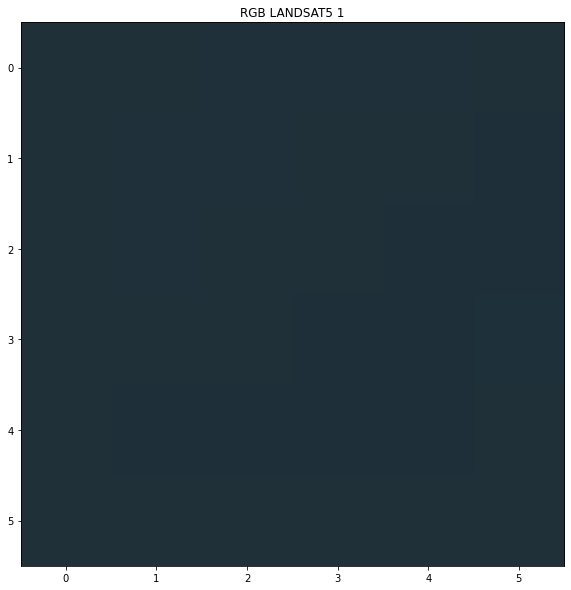

[[[0.12472972 0.18945293 0.22698976]
  [0.12433667 0.19082862 0.22620365]
  [0.1252538  0.19122168 0.2272518 ]
  [0.12577789 0.19037007 0.22718629]
  [0.12518829 0.19023904 0.22751385]
  [0.12433667 0.19069761 0.22751385]]

 [[0.12649848 0.18978047 0.22771038]
  [0.126564   0.1905666  0.22692426]
  [0.1252538  0.1906321  0.22738281]
  [0.1252538  0.19037007 0.22698976]
  [0.1253193  0.19023904 0.22757936]
  [0.1245987  0.1913527  0.22836548]]

 [[0.12505727 0.19037007 0.22672772]
  [0.12603992 0.1905666  0.22659671]
  [0.12603992 0.19181126 0.22672772]
  [0.1259089  0.19141822 0.22659671]
  [0.12564686 0.1906321  0.22757936]
  [0.12676051 0.19187677 0.22875853]]

 [[0.12407463 0.19023904 0.2272518 ]
  [0.12571236 0.18958396 0.22718629]
  [0.12453319 0.19017354 0.22718629]
  [0.12492625 0.19128719 0.22698976]
  [0.12486074 0.19069761 0.22757936]
  [0.12636746 0.19109067 0.22679323]]

 [[0.12558134 0.19168025 0.22790691]
  [0.12472972 0.19076312 0.22685874]
  [0.1252538  0.19095965 0.227

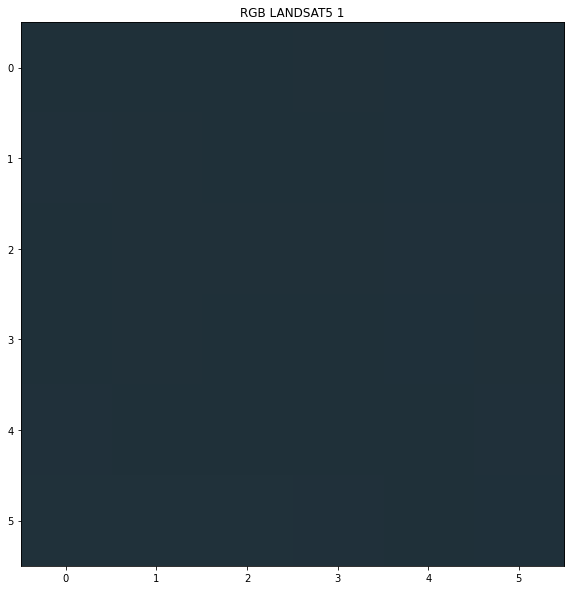

[[[0.12649848 0.19253187 0.2286275 ]
  [0.12833273 0.1926629  0.22947913]
  [0.1287258  0.19449714 0.22947913]
  [0.12846376 0.19351451 0.22895506]
  [0.12800519 0.19449714 0.2292171 ]
  [0.12859477 0.19449714 0.22888955]]

 [[0.12636746 0.19226983 0.22803792]
  [0.12859477 0.19325247 0.22967565]
  [0.12885681 0.19456266 0.22915158]
  [0.12767765 0.19397306 0.22816895]
  [0.12800519 0.1941696  0.22843099]
  [0.1273501  0.19344899 0.22875853]]

 [[0.126695   0.19285941 0.22843099]
  [0.12695704 0.1927284  0.22902057]
  [0.12728459 0.19351451 0.22888955]
  [0.12715358 0.19430062 0.228562  ]
  [0.12787418 0.19390756 0.22823445]
  [0.12774315 0.19371104 0.22797242]]

 [[0.12623644 0.19285941 0.22823445]
  [0.12610543 0.1926629  0.22790691]
  [0.12708807 0.19299044 0.22803792]
  [0.12787418 0.19318697 0.22843099]
  [0.12787418 0.19371104 0.22869302]
  [0.12708807 0.19318697 0.22888955]]

 [[0.12702255 0.19305594 0.22875853]
  [0.12676051 0.19344899 0.22836548]
  [0.1266295  0.19364552 0.229

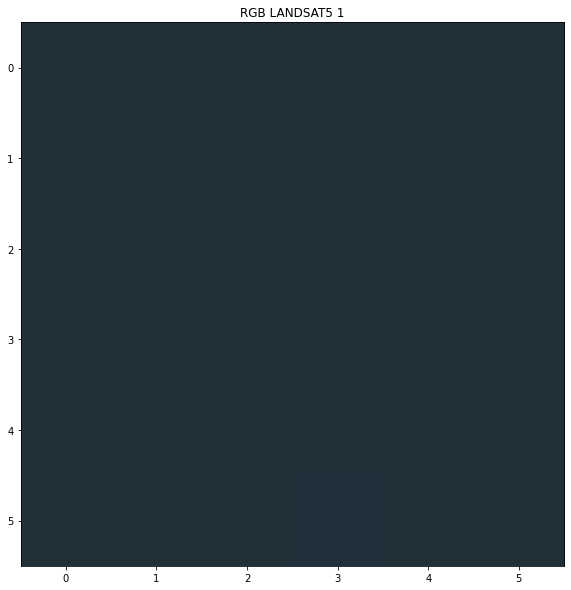

[[[0.1252538  0.18964946 0.2272518 ]
  [0.12499176 0.1899115  0.22692426]
  [0.1253193  0.19122168 0.22672772]
  [0.12512279 0.19069761 0.22679323]
  [0.12427115 0.19069761 0.22574508]
  [0.12355056 0.19115618 0.22587611]]

 [[0.12577789 0.19037007 0.22613814]
  [0.12571236 0.19050108 0.22764488]
  [0.12479523 0.19174576 0.22685874]
  [0.1252538  0.19148372 0.2272518 ]
  [0.1252538  0.19168025 0.2273173 ]
  [0.12649848 0.1905666  0.22646569]]

 [[0.12564686 0.1906321  0.22659671]
  [0.12577789 0.19161475 0.2272518 ]
  [0.12512279 0.19102515 0.22672772]
  [0.12584339 0.19102515 0.22738281]
  [0.12571236 0.1905666  0.22679323]
  [0.12440218 0.1905666  0.22640018]]

 [[0.12564686 0.18964946 0.22679323]
  [0.12453319 0.19089414 0.22594161]
  [0.12492625 0.19076312 0.22679323]
  [0.12512279 0.19141822 0.22764488]
  [0.12427115 0.19023904 0.22698976]
  [0.12400912 0.18971497 0.22587611]]

 [[0.12472972 0.19148372 0.22797242]
  [0.12499176 0.19109067 0.22757936]
  [0.12440218 0.19017354 0.227

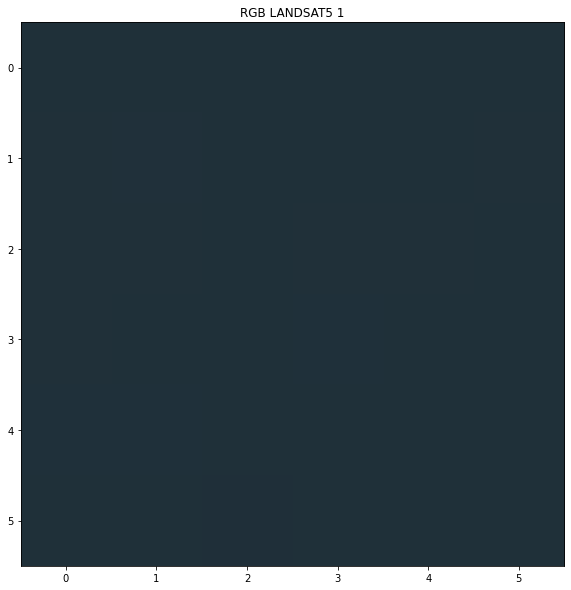

[[[0.12512279 0.19141822 0.22764488]
  [0.12427115 0.19023904 0.22698976]
  [0.12400912 0.18971497 0.22587611]
  [0.1231575  0.19030455 0.22679323]
  [0.12381259 0.189977   0.22659671]
  [0.12453319 0.19043557 0.22626916]]

 [[0.12433667 0.19004253 0.22581059]
  [0.12505727 0.19102515 0.22672772]
  [0.12433667 0.19102515 0.22666222]
  [0.12355056 0.18958396 0.22679323]
  [0.12302648 0.18945293 0.22620365]
  [0.12328852 0.18951845 0.22561407]]

 [[0.12296097 0.1884703  0.22646569]
  [0.123092   0.18873233 0.22646569]
  [0.12348504 0.1891909  0.22561407]
  [0.12433667 0.18912539 0.22613814]
  [0.1231575  0.189846   0.22607264]
  [0.1217163  0.19010803 0.22581059]]

 [[0.12276445 0.18833928 0.22535203]
  [0.11981653 0.18735664 0.22594161]
  [0.11857185 0.18696359 0.22659671]
  [0.12060264 0.18827377 0.2265312 ]
  [0.1224369  0.18912539 0.2265312 ]
  [0.12093019 0.1899115  0.22672772]]

 [[0.12263343 0.18866682 0.22574508]
  [0.12302648 0.1891909  0.2265312 ]
  [0.12302648 0.18905988 0.226

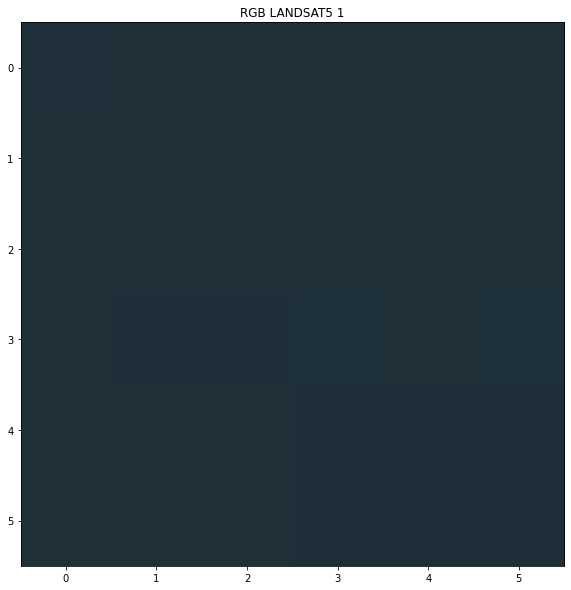

[[[0.1259744  0.19305594 0.22849649]
  [0.12702255 0.19351451 0.22875853]
  [0.12892233 0.19449714 0.22908607]
  [0.12767765 0.19364552 0.22849649]
  [0.12689154 0.19305594 0.22823445]
  [0.12859477 0.19331798 0.22915158]]

 [[0.12649848 0.1941696  0.22961015]
  [0.12741561 0.19403858 0.228562  ]
  [0.12780866 0.19318697 0.22843099]
  [0.12617093 0.19292492 0.22869302]
  [0.12643297 0.19292492 0.22803792]
  [0.12715358 0.19246636 0.22869302]]

 [[0.12866029 0.1956108  0.23013422]
  [0.12721908 0.19508673 0.22954464]
  [0.12610543 0.19331798 0.22790691]
  [0.12630196 0.19285941 0.22882403]
  [0.12636746 0.19351451 0.22810343]
  [0.1273501  0.19318697 0.22849649]]

 [[0.12682603 0.19377655 0.22875853]
  [0.12715358 0.19390756 0.22882403]
  [0.12715358 0.19371104 0.22902057]
  [0.12695704 0.19344899 0.22908607]
  [0.1273501  0.19344899 0.2286275 ]
  [0.12748112 0.19325247 0.22882403]]

 [[0.1252538  0.19285941 0.22790691]
  [0.12649848 0.19259737 0.22843099]
  [0.12649848 0.19253187 0.228

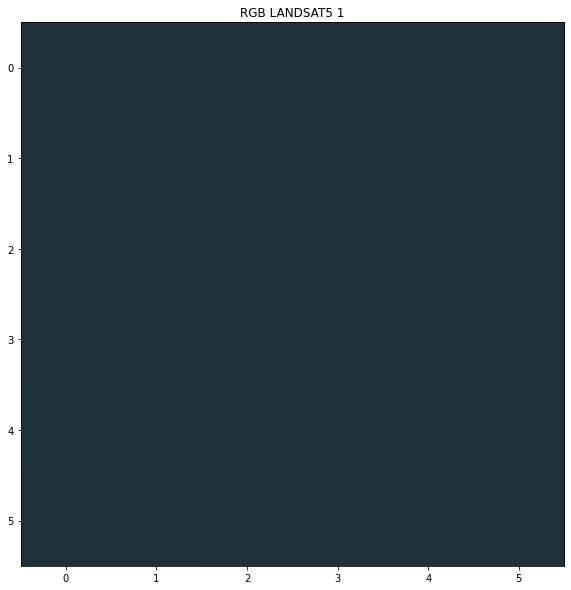

In [110]:
import matplotlib.pyplot as plt
import numpy as np

display_num = 1000


#for i in range(1, display_num):
cont_1 = 0
cont_0 = 0
elements = train_dba.take(display_num).as_numpy_iterator()
for i in range(0, display_num):
  
  c=0
  x, y = elements.next()
  landcover_ = y[0]
  #print(tf.squeeze(x[0]).numpy())
  #Multiply by 2.5 inverse of 0.4 to get the actual range of the image
  #NIR
  #tensor = x[0][:,:,[3,2,1]]*2.5
  #True color 
  tensor = x[0][:,:,[2,1,0]]*2.5

  #print(tensor)
  #print(landcover_)
  
  if landcover_ == [[[1.]]] and cont_1 <= 5:
    print(tensor)
    plt.figure(figsize=(10, 10))
    #plt.subplot(display_num, 1, 1)
    plt.imshow(tensor)
    plt.title("RGB LANDSAT5 1")
    cont_1 += 1
    plt.show()
  elif cont_0 <= 5:
    print(tensor)
    plt.figure(figsize=(10, 10))
    #print(target.sum())  
    #plt.subplot(display_num, 1, 1)
    plt.imshow(tensor)
    plt.title("RGB LANDSAT5 0")
    cont_0 += 1
    plt.show()

  #plt.subplot(display_num, 2, c + 2)
  #plt.imshow(target)
  #plt.title("Crop Area")

  #plt.show()


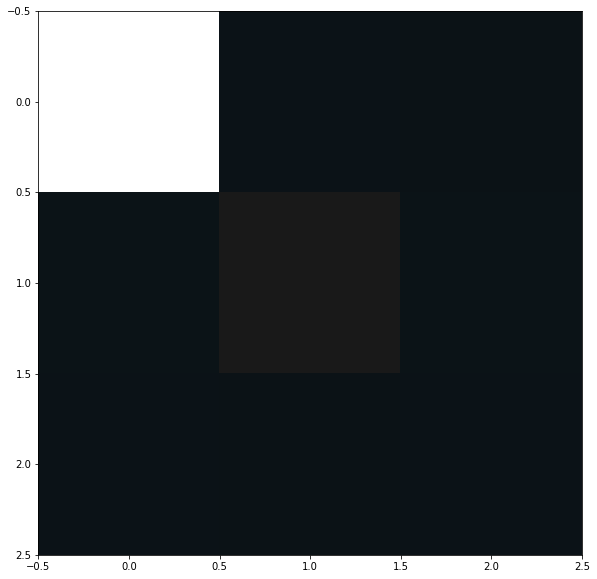

In [88]:
plt.figure(figsize=(10,10))
m = [[[1, 1, 1],
    [0.04495859, 0.07125123, 0.09020157],
    [0.04493274, 0.07073417, 0.08976207]],

  [[0.04702684, 0.07481896, 0.09144253],
    [0.1,  0.1, 0.1],
    [0.04617369, 0.07466384, 0.09027913]],

  [[0.04568248, 0.072699,   0.09066693],
    [0.04511371, 0.07254388, 0.09009816],
    [0.04557907, 0.07360386, 0.09033084]]]
plt.imshow(m)

In [47]:
IMG_SHAPE  = (6, 6, 4)
EPOCHS = 3

# Model

In [85]:
from tensorflow.keras import layers

def conv_block(input_tensor, num_filters):
  encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
  encoder = layers.BatchNormalization()(encoder)
  encoder = layers.Activation('relu')(encoder)
  encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
  encoder = layers.BatchNormalization()(encoder)
  encoder = layers.Activation('relu')(encoder)
  return encoder

def encoder_block(input_tensor, num_filters):
  encoder = conv_block(input_tensor, num_filters)
  encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)
  
  return encoder_pool, encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
  decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
  decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  return decoder

inputs = layers.Input(shape=IMG_SHAPE)
# 6
encoder0_pool, encoder0 = encoder_block(inputs, 6)
# 3
#encoder1_pool, encoder1 = encoder_block(encoder0_pool, 3)
# 1?
center = conv_block(encoder0_pool, 6)
# center
#decoder1 = decoder_block(center, encoder1, 3)
# 3
decoder0 = decoder_block(center, encoder0, 6)
# 6


pool = layers.MaxPooling2D(6, (6,6))(decoder0)

outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(pool)


In [86]:
from tensorflow.keras import models
model = models.Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 6, 6, 4)]    0                                            
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 6, 6, 6)      222         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_73 (BatchNo (None, 6, 6, 6)      24          conv2d_69[0][0]                  
__________________________________________________________________________________________________
activation_73 (Activation)      (None, 6, 6, 6)      0           batch_normalization_73[0][0]     
____________________________________________________________________________________________

**Defining custom metrics and loss functions**

In [87]:
from tensorflow.keras import losses

def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

def bce_dice_loss(y_true, y_pred):
  loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
  return loss

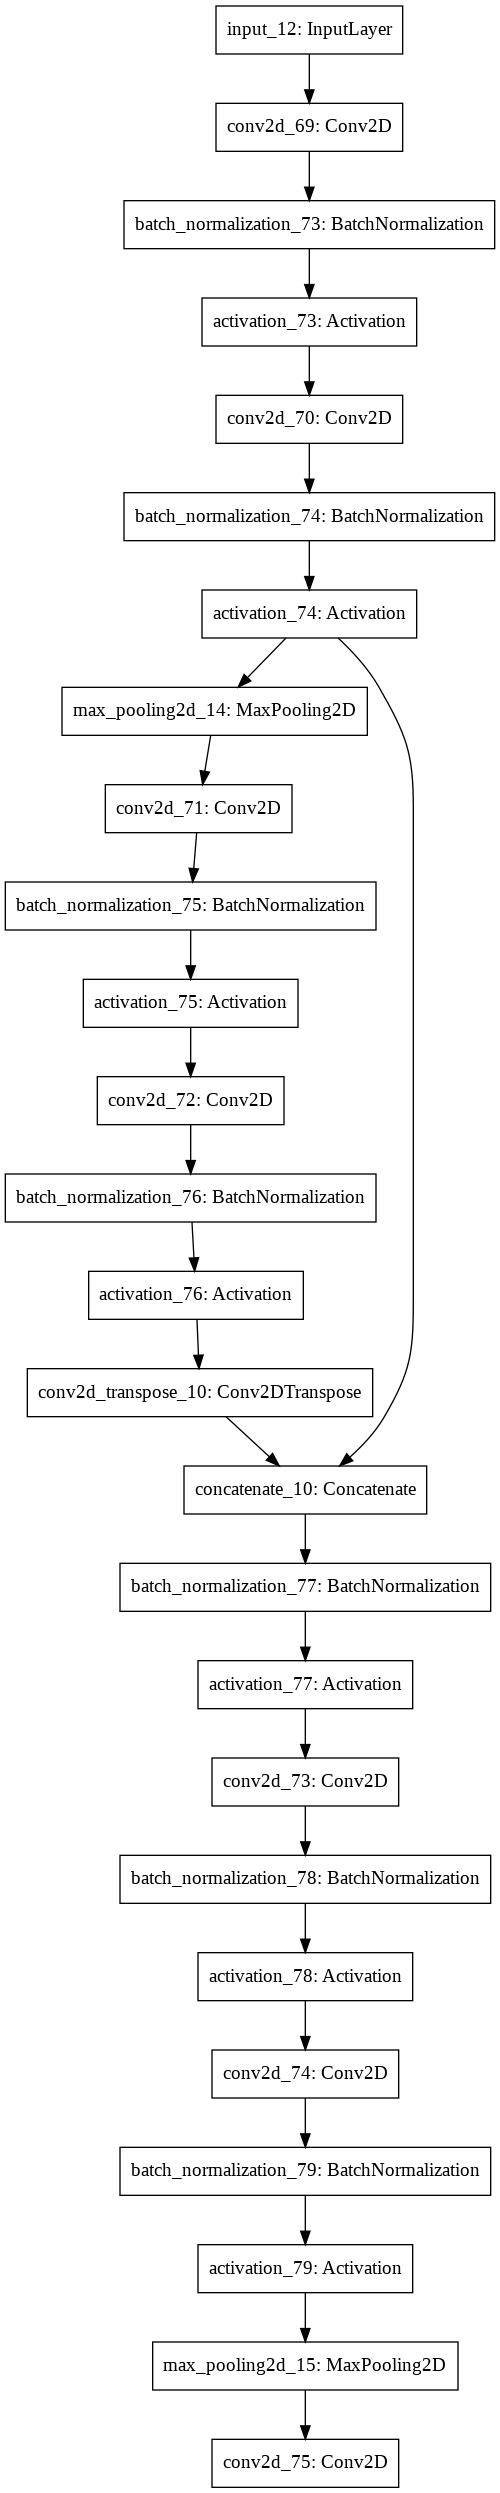

In [95]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import metrics
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_loss, 'RootMeanSquaredError'])
plot_model(model)

# Training the model

You train a Keras model by calling `.fit()` on it.  Here we're going to train for 10 epochs, which is suitable for demonstration purposes.  For production use, you probably want to optimize this parameter, for example through [hyperparamter tuning](https://cloud.google.com/ml-engine/docs/tensorflow/using-hyperparameter-tuning).

In [ ]:
from tensorflow import keras


In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [97]:
N_train = 2000
batch_size = 16

# Train the model I just do it for 15 minutes
history = model.fit(train_dba,
                    steps_per_epoch= int(np.ceil(N_train / float(batch_size))),
                    epochs=EPOCHS,
                    validation_data=test_dba)

Epoch 1/3
125/125 [==============================] - 11s 80ms/step - loss: 7.5081e-07 - dice_loss: 7.0667e-07 - root_mean_squared_error: 4.7371e-08 - val_loss: 3.9004 - val_dice_loss: 0.2356 - val_root_mean_squared_error: 0.6862
Epoch 2/3
125/125 [==============================] - 8s 68ms/step - loss: 3.4740e-07 - dice_loss: 3.2616e-07 - root_mean_squared_error: 2.2036e-08 - val_loss: 5.4715 - val_dice_loss: 0.2358 - val_root_mean_squared_error: 0.6868
Epoch 3/3
125/125 [==============================] - 9s 74ms/step - loss: 2.1639e-07 - dice_loss: 2.0409e-07 - root_mean_squared_error: 1.2738e-08 - val_loss: 6.1673 - val_dice_loss: 0.2358 - val_root_mean_squared_error: 0.6868


**Prediction**

In [100]:
collection2019 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA').filterDate('2020-06-01', '2020-06-30').filterBounds(AOI).map(addQualityBands)

#print(collection2019,'least cloud 2019')

image2020 = collection2019.qualityMosaic('system:time_start')
image2020 = image2020.select(bands)

In [101]:
mapid4 = image2020.getMapId({'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3})
map = folium.Map(location = [-5.7, -51.3],  zoom_start=6)
folium.TileLayer(
    tiles=mapid4['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='masked imagery',
  ).add_to(map)
map

In [ ]:
desc = 'Predict_Brazil'

# Specify patch and file dimensions.
imageExportFormatOptions = {
  'patchDimensions': [6, 6],
  'compressed': True
}

# Setup the task.
imageTask = ee.batch.Export.image.toCloudStorage(
  image=image2020,
  description='Image Export',
  fileNamePrefix=FOLDER + '/' + desc,
  bucket=BUCKET,
  scale=30,
  fileFormat='TFRecord',
  region=AOI,
  formatOptions=imageExportFormatOptions,
)

imageTask.start()

while imageTask.active():
  print('Polling for task (id: {}).'.format(imageTask.id))
  time.sleep(5)

Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id: BULCTFUWOWJG3XSIFCU4CGZM).
Polling for task (id